In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
df = df.drop('id', axis=1)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['year'] = df['date'].apply(lambda date:date.year)

In [7]:
df['month'] = df['date'].apply(lambda date:date.month)

In [8]:
df = df.drop('date', axis=1)

In [9]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 21 columns]

In [10]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [11]:
df = df.drop('zipcode', axis=1)

In [12]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [14]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year  

In [16]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007547      0.234292      3.409825      7.657915   
std        0.539683      0.086549      0.766390      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     291.725008   1970.999676     84.464787     47.560093   
std      827.759761     442.667800     29.375234    401.821438      0.138552   
min      370.000000       0.000000   1900.000000      0.000000     47.155900   
25%     1190.000000       0.000000   1951.000000      0.000000     47.471100   
50%     1560.000000       0.000000   1975.000000      0.000000     47.571800   
75%     2210.000000     560.000000   1997.000000      0.000000     47.678000   
max     9410.000000    4820.000000   2015.000000   2015.000000     47.777600   

               long  sqft_living15     sqft_lot15          year         month  
count  21597.000000   21597.000000   21597.000000  21597.000000  21597.000000  
mean    -122.213982    1986.620318   12758.283512   2014.322962      6.573969  
std        0.140724     685.230472   27274.441950      0.467619      3.115061  
min     -122.519000     399.000000     651.000000   2014.000000      1.000000  
25%     -122.328000    1490.000000    5100.000000   2014.000000      4.000000  
50%     -122.231000    1840.000000    7620.000000   2014.000000      6.000000  
75%     -122.125000    2360.000000   10083.000000   2015.000000      9.000000  
max     -121.315000    6210.000000  871200.000000   2015.000000     12.000000

<AxesSubplot:xlabel='price', ylabel='Count'>

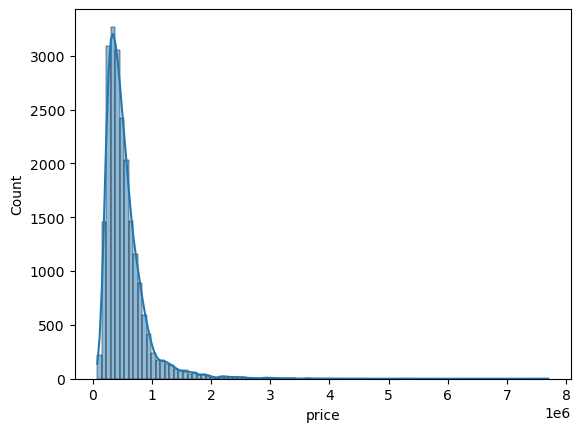

In [17]:
sns.histplot(df['price'], bins=100,  kde=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

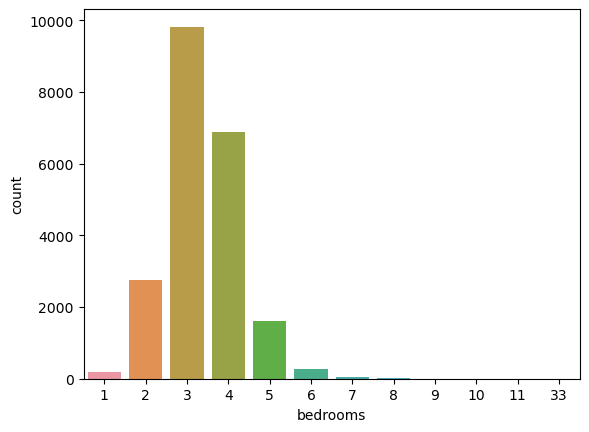

In [18]:
sns.countplot(df['bedrooms'])

<AxesSubplot:>

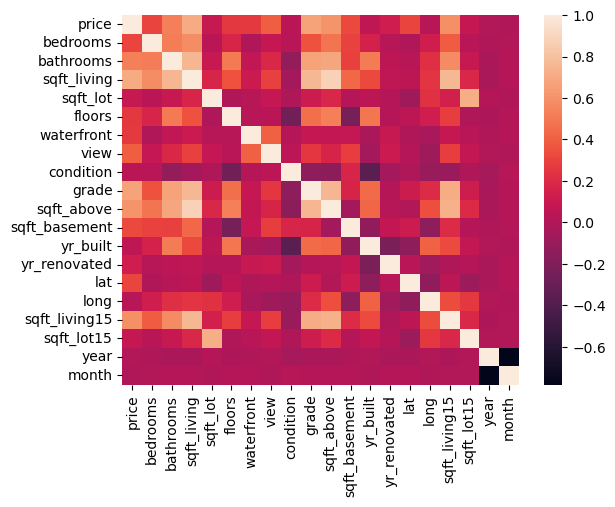

In [19]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

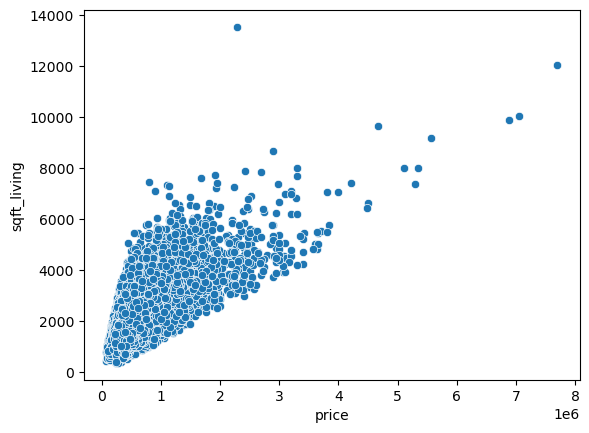

In [20]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

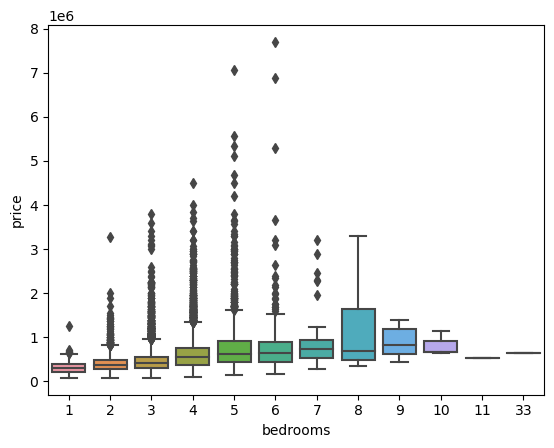

In [21]:
sns.boxplot(x='bedrooms', y='price', data=df)

<Figure size 2400x1800 with 0 Axes>

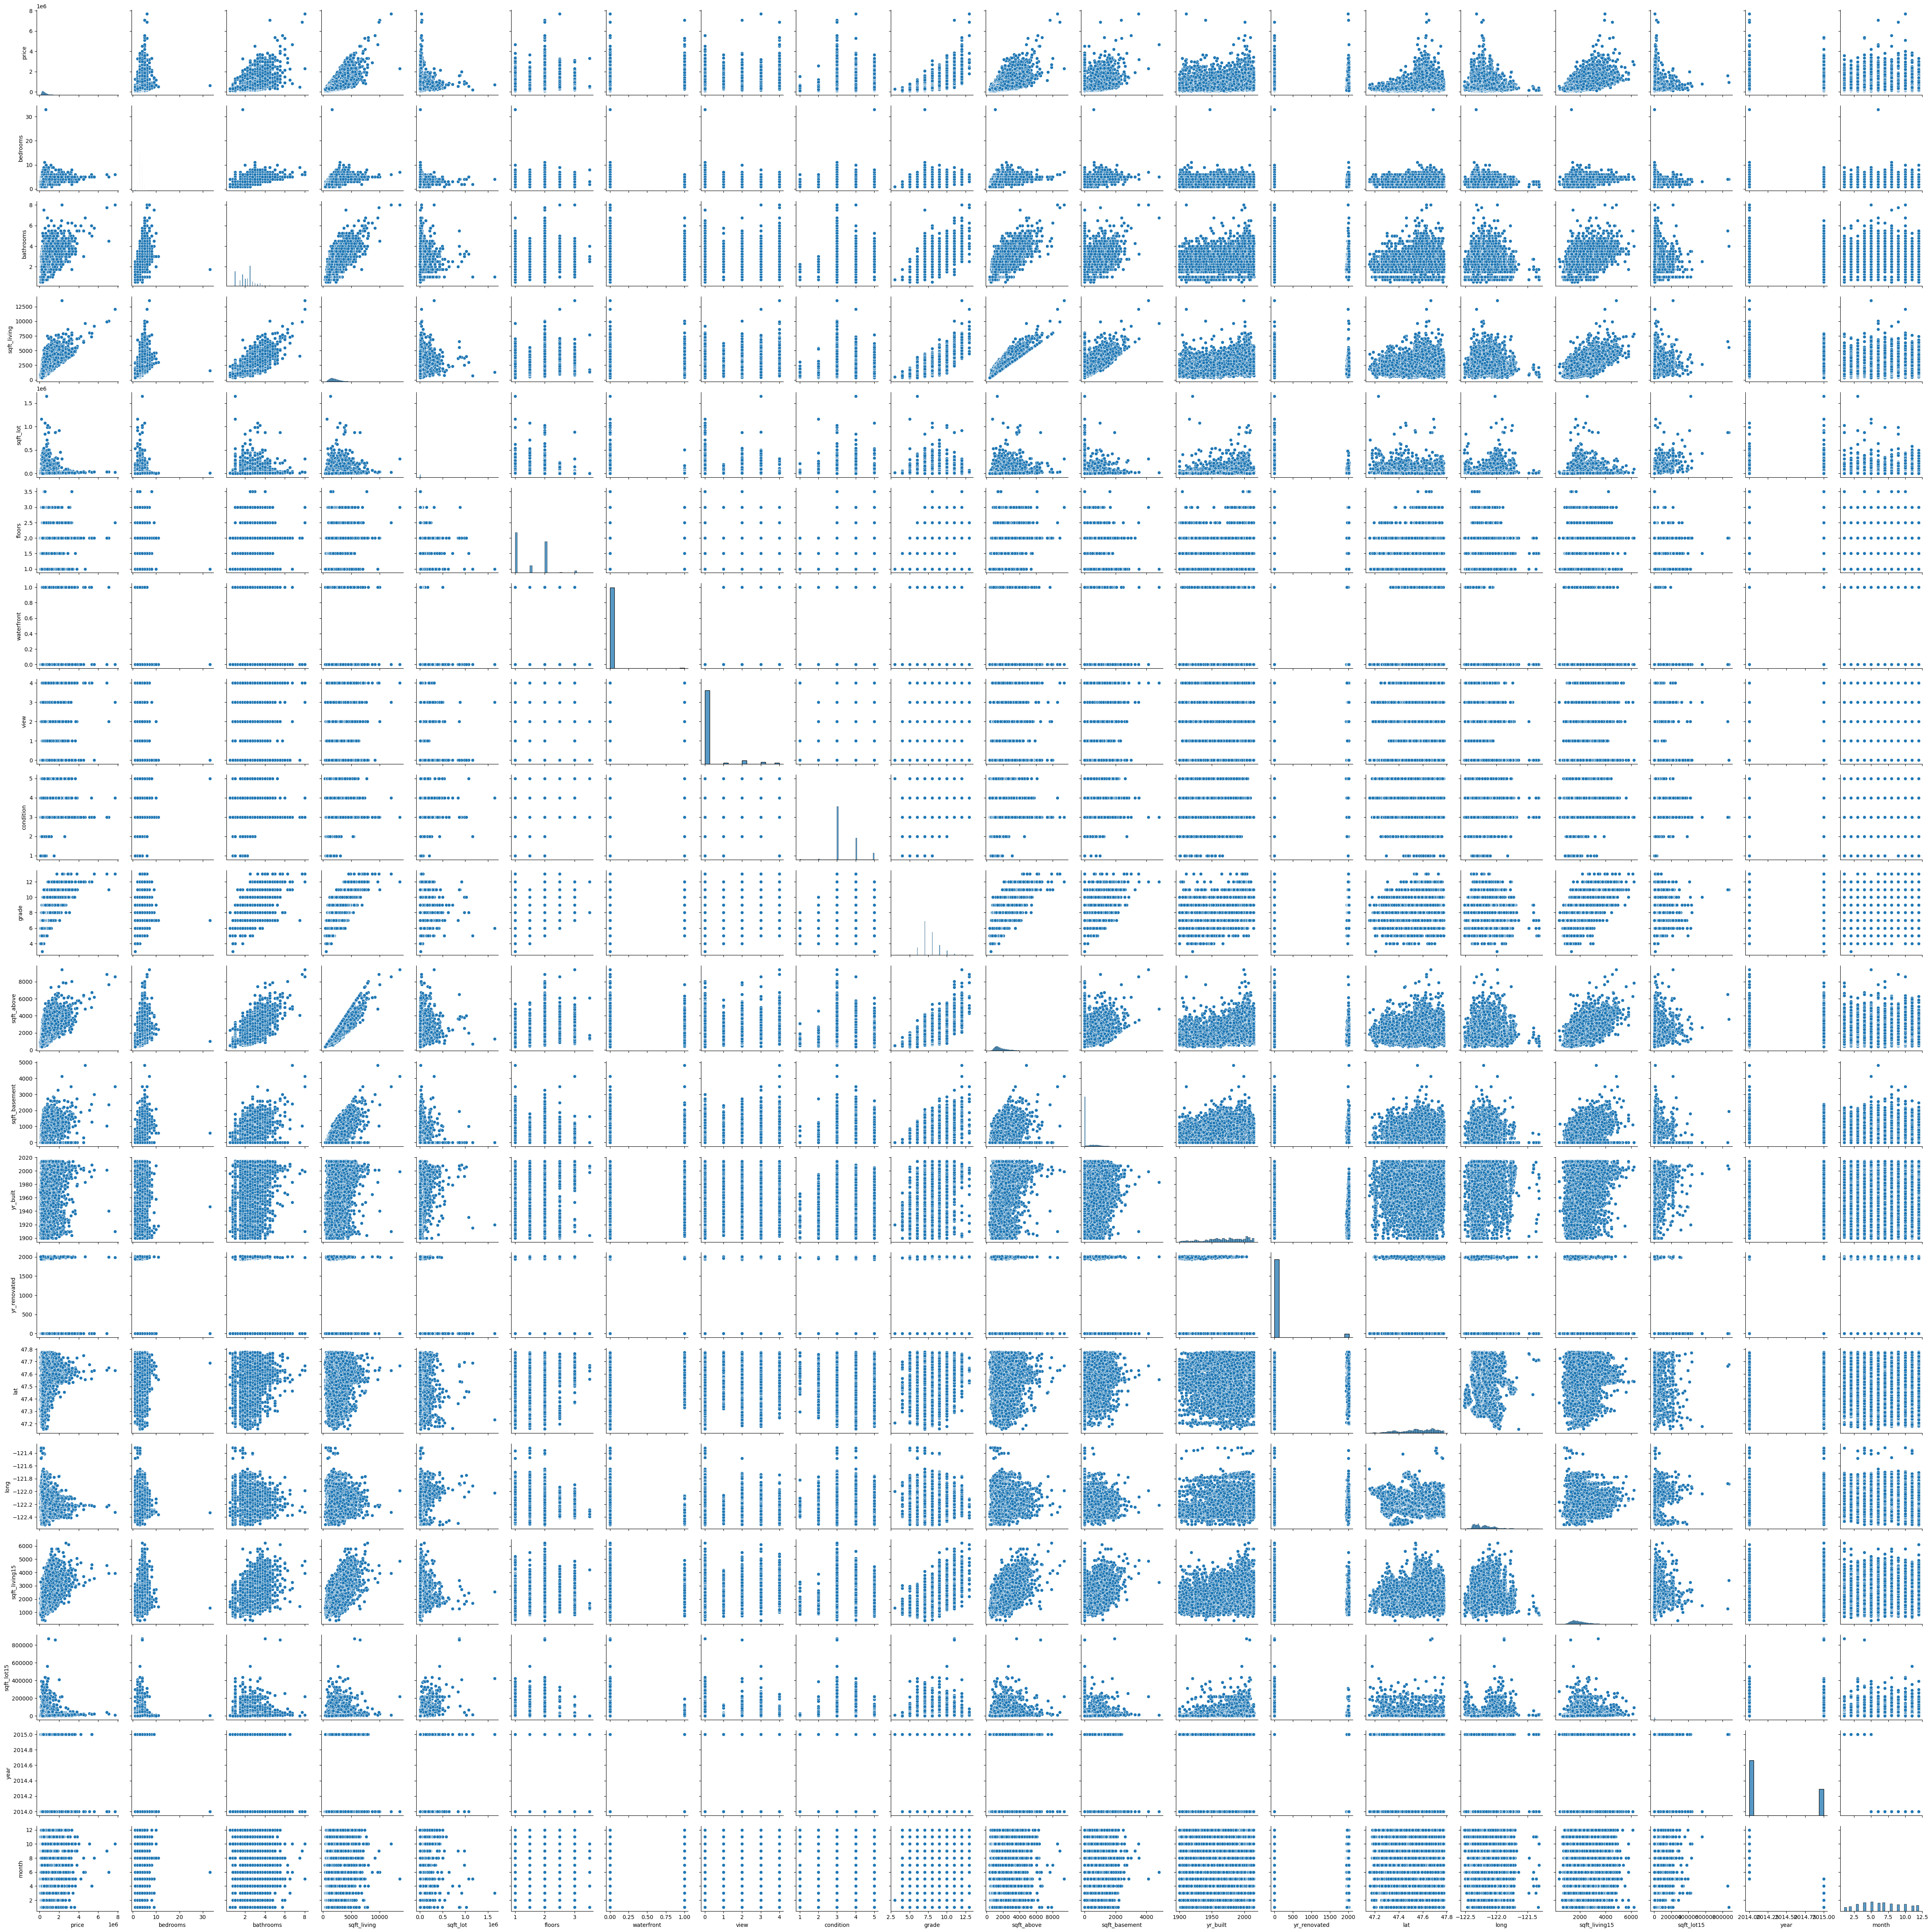

In [22]:
plt.figure(figsize=(24,18))
sns.pairplot(data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

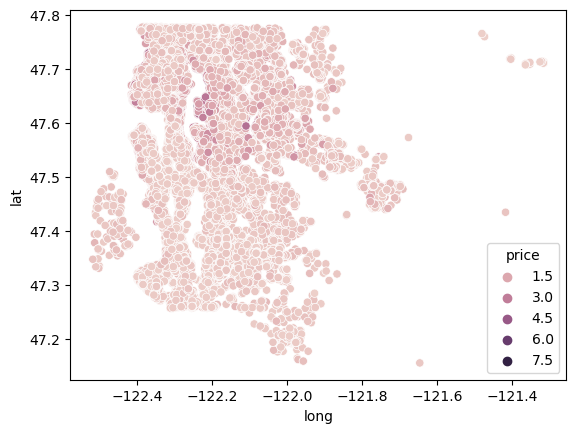

In [23]:
sns.scatterplot(x='long', y='lat', data=df, hue='price')

<AxesSubplot:xlabel='year', ylabel='price'>

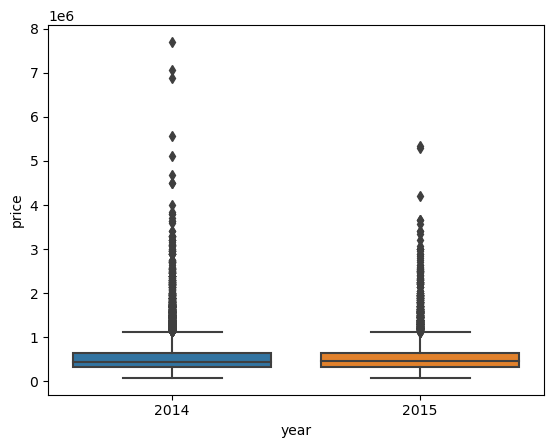

In [24]:
sns.boxplot(x='year', y='price', data=df)

<AxesSubplot:xlabel='year'>

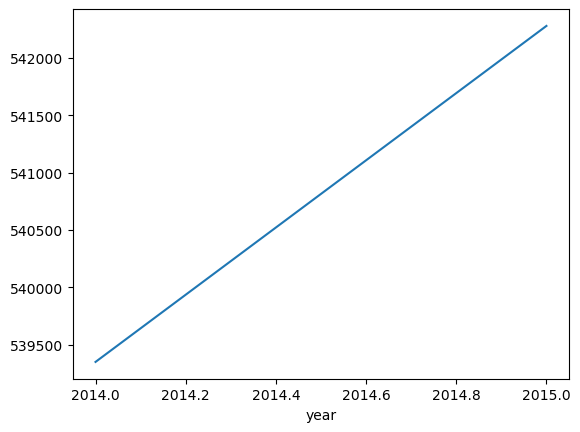

In [25]:
df.groupby('year').mean()['price'].plot()

<AxesSubplot:xlabel='month', ylabel='price'>

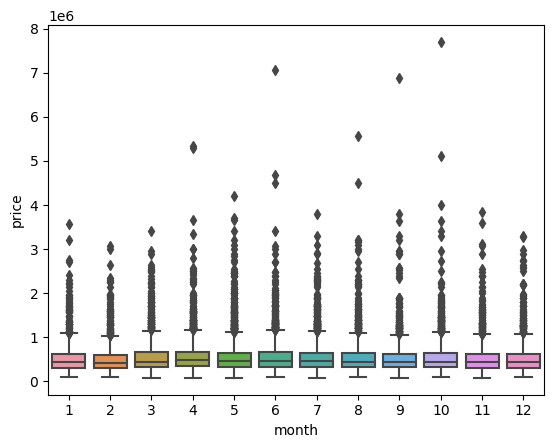

In [26]:
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

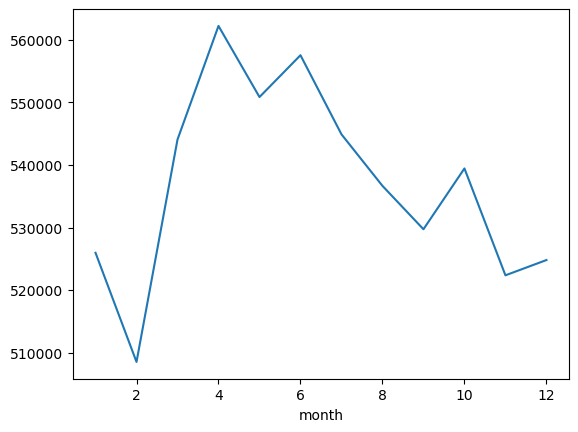

In [27]:
df.groupby('month').mean()['price'].plot()

In [28]:
X = df.drop('price', axis=1)

In [29]:
X = X.drop('month', axis=1)

In [30]:
X = X.drop('year', axis=1)

In [31]:
X = X.values

In [32]:
y = df['price'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_test's shape: ", X_test.shape)
print("X_test's shape: ", X_test.shape)

X_train's shape:  (15117, 17)
y_train's shape:  (15117,)
X_test's shape:  (6480, 17)
X_test's shape:  (6480, 17)


In [35]:
scaler = MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
scaler.fit(X_train)

MinMaxScaler()

In [38]:
X_train = scaler.transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

In [41]:
model.compile(optimizer='adam', loss='mse')

In [42]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=250)

Epoch 1/250
119/119 [==============================] - 2s 5ms/step - loss: 423514996736.0000 - val_loss: 434304090112.0000
Epoch 2/250
119/119 [==============================] - 0s 3ms/step - loss: 421036982272.0000 - val_loss: 427039064064.0000
Epoch 3/250
119/119 [==============================] - 0s 3ms/step - loss: 401461215232.0000 - val_loss: 389327519744.0000
Epoch 4/250
119/119 [==============================] - 0s 3ms/step - loss: 338369445888.0000 - val_loss: 297644392448.0000
Epoch 5/250
119/119 [==============================] - 0s 3ms/step - loss: 228406280192.0000 - val_loss: 177944068096.0000
Epoch 6/250
119/119 [==============================] - 0s 3ms/step - loss: 130472378368.0000 - val_loss: 111057289216.0000
Epoch 7/250
119/119 [==============================] - 0s 3ms/step - loss: 95481675776.0000 - val_loss: 99327885312.0000
Epoch 8/250
119/119 [==============================] - 0s 3ms/step - loss: 90862583808.0000 - val_loss: 97614381056.0000
Epoch 9/250
119/119 

119/119 [==============================] - 0s 3ms/step - loss: 39260643328.0000 - val_loss: 44142592000.0000
Epoch 69/250
119/119 [==============================] - 0s 3ms/step - loss: 39064240128.0000 - val_loss: 43977453568.0000
Epoch 70/250
119/119 [==============================] - 0s 3ms/step - loss: 38903656448.0000 - val_loss: 43832754176.0000
Epoch 71/250
119/119 [==============================] - 0s 3ms/step - loss: 38761164800.0000 - val_loss: 43596972032.0000
Epoch 72/250
119/119 [==============================] - 0s 3ms/step - loss: 38576697344.0000 - val_loss: 43393433600.0000
Epoch 73/250
119/119 [==============================] - 0s 4ms/step - loss: 38416351232.0000 - val_loss: 43216584704.0000
Epoch 74/250
119/119 [==============================] - 0s 3ms/step - loss: 38262689792.0000 - val_loss: 43042201600.0000
Epoch 75/250
119/119 [==============================] - 0s 3ms/step - loss: 38132469760.0000 - val_loss: 42850836480.0000
Epoch 76/250
119/119 [===============

Epoch 135/250
119/119 [==============================] - 0s 3ms/step - loss: 32499275776.0000 - val_loss: 35940179968.0000
Epoch 136/250
119/119 [==============================] - 0s 3ms/step - loss: 32473305088.0000 - val_loss: 35839070208.0000
Epoch 137/250
119/119 [==============================] - 0s 3ms/step - loss: 32407175168.0000 - val_loss: 35801243648.0000
Epoch 138/250
119/119 [==============================] - 0s 3ms/step - loss: 32385351680.0000 - val_loss: 35791732736.0000
Epoch 139/250
119/119 [==============================] - 0s 3ms/step - loss: 32369410048.0000 - val_loss: 35790254080.0000
Epoch 140/250
119/119 [==============================] - 0s 3ms/step - loss: 32329422848.0000 - val_loss: 35689332736.0000
Epoch 141/250
119/119 [==============================] - 0s 3ms/step - loss: 32295012352.0000 - val_loss: 35644858368.0000
Epoch 142/250
119/119 [==============================] - 0s 4ms/step - loss: 32273661952.0000 - val_loss: 35585384448.0000
Epoch 143/250
11

119/119 [==============================] - 1s 4ms/step - loss: 30923407360.0000 - val_loss: 33868709888.0000
Epoch 202/250
119/119 [==============================] - 0s 3ms/step - loss: 30912985088.0000 - val_loss: 33848152064.0000
Epoch 203/250
119/119 [==============================] - 0s 4ms/step - loss: 30890688512.0000 - val_loss: 33803436032.0000
Epoch 204/250
119/119 [==============================] - 0s 4ms/step - loss: 30859968512.0000 - val_loss: 33784543232.0000
Epoch 205/250
119/119 [==============================] - 0s 3ms/step - loss: 30838069248.0000 - val_loss: 33782843392.0000
Epoch 206/250
119/119 [==============================] - 0s 4ms/step - loss: 30843320320.0000 - val_loss: 33749399552.0000
Epoch 207/250
119/119 [==============================] - 0s 3ms/step - loss: 30814597120.0000 - val_loss: 33727342592.0000
Epoch 208/250
119/119 [==============================] - 0s 4ms/step - loss: 30771638272.0000 - val_loss: 33726967808.0000
Epoch 209/250
119/119 [=======

In [43]:
model.history.history

{'loss': [423514996736.0,
  421036982272.0,
  401461215232.0,
  338369445888.0,
  228406280192.0,
  130472378368.0,
  95481675776.0,
  90862583808.0,
  89507938304.0,
  88190394368.0,
  86833168384.0,
  85448941568.0,
  84026728448.0,
  82585968640.0,
  81081475072.0,
  79522021376.0,
  77940056064.0,
  76316491776.0,
  74611212288.0,
  72858173440.0,
  71101661184.0,
  69302861824.0,
  67483189248.0,
  65597366272.0,
  63780843520.0,
  62105300992.0,
  60385157120.0,
  58758209536.0,
  57156390912.0,
  55769993216.0,
  54467719168.0,
  53308731392.0,
  52251676672.0,
  51293065216.0,
  50476048384.0,
  49683619840.0,
  48948973568.0,
  48309207040.0,
  47708311552.0,
  47193190400.0,
  46664568832.0,
  46196563968.0,
  45727408128.0,
  45320327168.0,
  44936024064.0,
  44578840576.0,
  44203286528.0,
  43877818368.0,
  43593068544.0,
  43289497600.0,
  42985938944.0,
  42716278784.0,
  42423754752.0,
  42164748288.0,
  41896677376.0,
  41641734144.0,
  41428250624.0,
  41225691136.0,


In [44]:
loss = pd.DataFrame(model.history.history)

In [45]:
loss.head()

loss      val_loss
0  4.235150e+11  4.343041e+11
1  4.210370e+11  4.270391e+11
2  4.014612e+11  3.893275e+11
3  3.383694e+11  2.976444e+11
4  2.284063e+11  1.779441e+11

<AxesSubplot:>

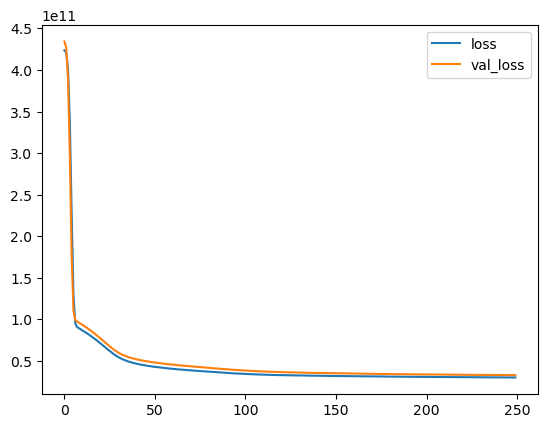

In [46]:
loss.plot()

In [47]:
y_pred = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [48]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))

Mean Squared Error:  33036722446.7418
Mean Absolute Error:  109610.77809244792
Explained Variance Score:  0.7660963265082578


In [49]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

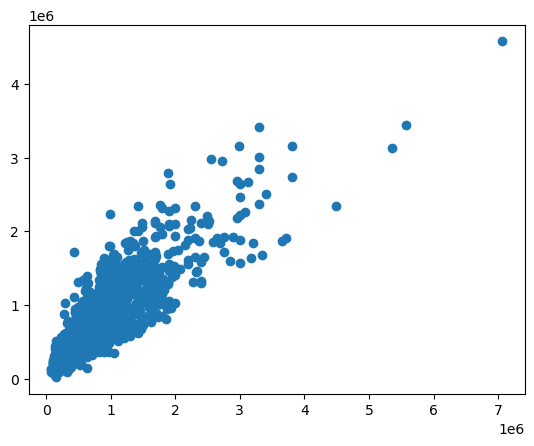

In [50]:
plt.scatter(y_test, y_pred)

In [57]:
example = df.drop(['price', 'month', 'year'], axis=1).iloc[10]

In [58]:
example.values.reshape(-1, 17)

array([[ 3.00000e+00,  2.50000e+00,  3.56000e+03,  9.79600e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         8.00000e+00,  1.86000e+03,  1.70000e+03,  1.96500e+03,
         0.00000e+00,  4.76007e+01, -1.22145e+02,  2.21000e+03,
         8.92500e+03]])

In [59]:
example.shape

(17,)

In [60]:
example = scaler.transform(example.values.reshape(-1, 17))

In [61]:
model.predict(example)

1/1 [==============================] - 0s 28ms/step


array([[677532.44]], dtype=float32)

In [63]:
df['price'].iloc[10]

662500.0